## Basic Pandas Math Operations
Altough we can use pandas to do advanced statistical analysis on dataset, let's get a good grip on the basics first. 

### Import Dataset
For this tutorial we'll be using the Boston median home price dataset from sklearn. 

You will first need to install sklearn before using this dataset: 

`pip install sklearn`

`conda install sklearn`

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']])

In [11]:
# pull out the feature names and use them as column names, adding a name for the target col
boston_df.columns = list(boston.feature_names) + ["median_home_val"]

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Adding two columns
We can add together two columns and assign the output to a new column: 

In [6]:
# add two columns
boston_df["home+tax"] = boston_df["TAX"] + boston_df["median_home_val"]

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,320.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,263.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,276.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,255.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,258.2


However, we can see that we'll actually need to do a bit of transformation first before we can add these two columns together. 

## Multiplying an entire column by a value
We need to convert the median home value to hundreds of thousands. For example, an entry that now says 24.0 will need to be converted to 240,000. 

In [8]:
boston_df["median_home_val"] = boston_df["median_home_val"] * 10000

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240000.0,320.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216000.0,263.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347000.0,276.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334000.0,255.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362000.0,258.2


### Casting a column to a different data type
The median home value is stil a float. Let's cast this to an int to clean things up a bit. 

In [10]:
boston_df["median_home_val"] = boston_df["median_home_val"].astype(int)

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240000,320.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216000,263.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347000,276.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334000,255.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362000,258.2


Convert the home+tax column from a float to an int: 

In [14]:
boston_df["home+tax"] = boston_df["home+tax"].astype(int)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240000,320
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216000,263
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347000,276
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334000,255
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362000,258


### Column calculations
There are several basic summary functions available for us to use on columns in our dataset. 

<img src="pandas_col_funcs.png" align="left">

### Count the number of instances in the crime column
We can apply these functions to each column using the following syntax: 

In [64]:
boston_df['CRIM'].count()

506

Let's find out more about crime in the Boston area. Below calculate the min, max and mean crime for this dataset: 

In [17]:
boston_df["CRIM"].mean()

3.6135235573122535

### Applying calculations and functions to every column
Sometimes we want to know things about every column in our dataset. Rather than apply the mean function (np.mean) on one column at a time, we can use the apply method to apply the function across each column in our dataset. Below, the "axis=0" argument tells us to apply the calculation to across each column. 

In [74]:
boston_df.apply(np.mean, axis=0)

CRIM                    3.593761
ZN                     11.363636
INDUS                  11.136779
CHAS                    0.069170
NOX                     0.554695
RM                      6.284634
AGE                    68.574901
DIS                     3.795043
RAD                     9.549407
TAX                   408.237154
PTRATIO                18.455534
B                     356.674032
LSTAT                  12.653063
median_home_val    225328.063241
home+tax              430.769960
dtype: float64

### Correlation
We can use the corr() method to examine correlation between variables: 

In [80]:
boston_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832,0.572464
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.302262
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.711712
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,-0.026673
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.660812


Let's store the correlation matrix so that we can plot it. 

In [88]:
correlations= boston_df.corr(method='pearson')

We can plot it using built in functionality with a heatmap: 

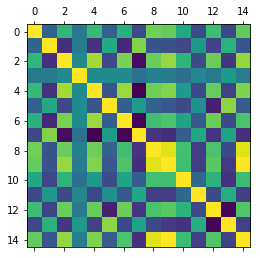

In [90]:
# the first line tells pandas to print the plot in the notebook instead of saving to file
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(correlations)

We can also use builtin functionality to plot the correlation values, set to a decimal precision of 2 for prettiness. 

In [93]:
correlations.style.background_gradient().set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_home_val,home+tax
CRIM,1,-0.2,0.4,-0.055,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39,0.57
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,-0.3
INDUS,0.4,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48,0.71
CHAS,-0.055,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18,-0.027
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,0.66
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7,-0.26
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38,0.5
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25,-0.53
RAD,0.62,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38,0.91
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47,1
